Original Data:
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         2965 non-null   float64
 1   limit_balance               2965 non-null   float64
 2   sex                         2965 non-null   object 
 3   education_level             2965 non-null   object 
 4   marital_status              2965 non-null   object 
 5   pay_0                       2965 non-null   float64
 6   bill_amt_1                  2965 non-null   float64
 7   pay_amt_1                   2965 non-null   float64
 8   default_payment_next_month  2965 non-null   object 
dtypes: float64(5), object(4)
memory usage: 208.6+ KB
None

DataFrame - First 5 rows:
    age  limit_balance sex education_level marital_status  pay_0  bill_amt_1  \
0  54.0        80000.0   1               6              1    0.0     614

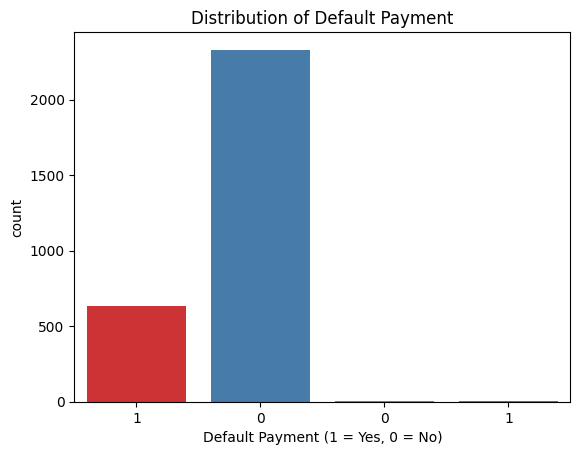

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Initialize a BigQuery client
client = bigquery.Client()

# Function to load data from BigQuery
def load_data():
    """
    Fetches credit card default dataset from BigQuery and converts it into a pandas DataFrame.

    Returns:
    pandas.DataFrame: Credit card default dataset.
    """
    # SQL query to select specific columns from the dataset
    query = """
    SELECT
      age,
      limit_balance,
      sex,
      education_level,
      marital_status,
      pay_0,
      bill_amt_1,
      pay_amt_1,
      default_payment_next_month
    FROM
      `bigquery-public-data.ml_datasets.credit_card_default`
    """
    # Execute the query and convert the result to a DataFrame
    return client.query(query).to_dataframe()

# Function to display basic information about the dataset
def display_dataset_info(data):
    """
    Prints basic information about the dataset, including column names, data types, and non-null counts.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    print("Dataset Info:")
    # Display information about the DataFrame, such as column names and data types
    print(data.info())

# Function to display the first 5 and last 5 rows of data in the DataFrame
def display_dataframe(data):
    """
    Displays the first 5 and last 5 rows of the DataFrame.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    print("\nDataFrame - First 5 rows:")
    # Display the first 5 rows of the DataFrame
    print(data.head())

    print("\nDataFrame - Last 5 rows:")
    # Display the last 5 rows of the DataFrame
    print(data.tail())

# Function to visualize the distribution of default payments
def visualize_default_distribution(data):
    """
    Creates and displays a count plot to visualize the distribution of default payments.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    # Create a count plot using seaborn
    sns.countplot(x='default_payment_next_month', data=data, palette='Set1')
    # Set plot title and labels
    plt.title('Distribution of Default Payment')
    plt.xlabel('Default Payment (1 = Yes, 0 = No)')
    # Display the plot
    plt.show()

# Load the data
credit_data = load_data()

#---INSERT NEW CODE---#

# Display original information and data
print("Original Data:")
display_dataset_info(credit_data)
display_dataframe(credit_data)

# Add 5 new records
new_records = [
    [54, 80000, 1, 6, 1, 0, 0, 0, 0],
    [30, 50000, 2, 3, 2, 2, 30000, 2000, 1],
    [40, 120000, 1, 1, 1, 1, 5000, 5000, 0],
    [25, 30000, 2, 2, 2, 2, 200, 200, 1],
    [35, 70000, 1, 6, 2, 0, 10000, 5000, 0]
]

columns = credit_data.columns
new_data = pd.DataFrame(new_records, columns=columns)

# Concatenate original DataFrame with new DataFrame
credit_data = pd.concat([credit_data, new_data], ignore_index=True)

#--- END ---#

#--- INSERT NEW RECORDS FROM DATAFRAME ---#

# Upload the new records to BigQuery - !ONLY REMOVE THE COMMENTS AND RUN THIS CODE ONCE PANDAS_GBQ IS INSTALLED!
#project_id = "your-project-id"  # Replace with your actual Google Cloud project ID
#dataset_id = "ml_datasets" # Replace with your actual dataset ID
#table_id = "credit_card_default" # Replace with your actual table ID

#credit_data.to_gbq(destination_table=f"{project_id}.{dataset_id}.{table_id}", if_exists="replace", table_schema="default")

#--- END ---#

# Display updated information and data
print("\nUpdated Data:")
display_dataset_info(credit_data)
display_dataframe(credit_data)
visualize_default_distribution(credit_data)